### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Simple Keras 모델 생성/학습 - AND Function

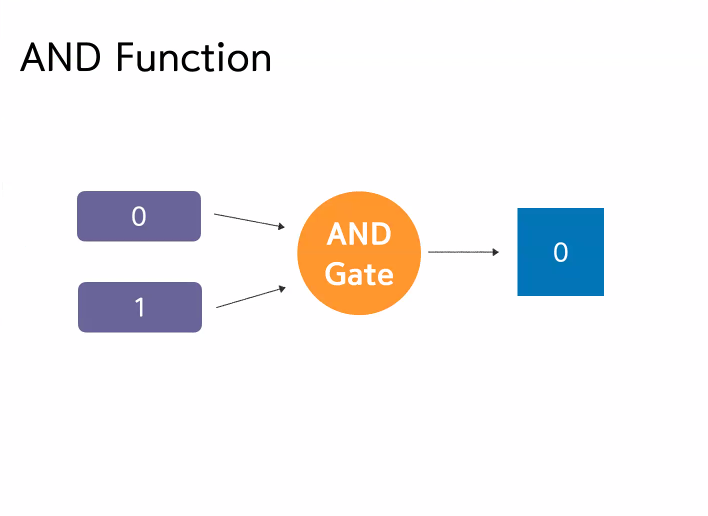

In [17]:
# 1. Numpy 가져오기

import numpy as np

print(np.__version__)

1.19.5


In [2]:
# 2. 입력/출력 데이터 만들기

# 순서에 맞게 지정해주어야한다.
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])

# print로 확인하기
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [0]
 [0]
 [1]]


In [3]:
# 3. Keras 패키지 가져오기

# 에전에는 import keras였지만 이제는 tensorflow에 들어가있어서 그 안에서 찾아야한다.
from tensorflow import keras
from tensorflow.keras import layers

print(keras.__version__)


2.4.0


In [45]:
# 4. Perceptron 모델 생성

# 하나의 퍼셉트론으로 되어있음을 유의해야한다.
# from keras.layers import Dense, Activation 을 사용하면 Dense로 layer를 사용할 수 있다.
from keras.layers import Dense, Activation

model = keras.Sequential() # 모델 초기화
# 퍼셉트론이 1개로 입력을 받자마다 출력이 됨으로 출력만 지정해준다.
# 출력으로는 0과 1이 들어옴으로 입력 변수는 2개, 출력은 1개로 출력되니 1개로 지정한다.
# (input개수 + 1) * (다음 노드의 개수) = 파라미터 개수
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid')) # 입력층이자 출력층, 단일 퍼셉트론

# 한 줄에도 사용이 가능하다.
#model.add(Dense(units=1, input_dim=2, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 5. Compile - Optimizer, Loss function 설정

sgd = keras.optimizers.SGD(lr=0.1)

model.compile(loss='binary_crossentropy', optimizer=sgd)


In [47]:
# 6. 학습시키기
# fit으로 학습시킨다.
# batch_size : 한번에 몇개의 문제를 보고 답을 할 것인지에 대한 것이다.
# epochs : 가지고있는 전체 데이터를 몇번 반복할 것이인지에 대한 것이다. 똑같은 데이터라고 반복하면 성능이 높아진다.
model.fit(X, y, batch_size=1, epochs=100)
# loss는 값의 차이로 줄어드는것이 좋다.

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7078
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7080
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6080
Epoch 4/100
4/4 [==============================] - 0s 864us/step - loss: 0.6266
Epoch 5/100
4/4 [==============================] - 0s 869us/step - loss: 0.8252
Epoch 6/100
4/4 [==============================] - 0s 836us/step - loss: 0.5059
Epoch 7/100
4/4 [==============================] - 0s 827us/step - loss: 0.6131
Epoch 8/100
4/4 [==============================] - 0s 873us/step - loss: 0.7441
Epoch 9/100
4/4 [==============================] - 0s 799us/step - loss: 0.7382
Epoch 10/100
4/4 [==============================] - 0s 825us/step - loss: 0.7715
Epoch 11/100
4/4 [==============================] - 0s 806us/step - loss: 0.6384
Epoch 12/100
4/4 [==============================] - 0s 850us/step - loss: 0.7143
Epoch 13/100
4/4 [=========================

In [48]:
# 7. 모델 테스트하기
test_data = np.array([[0,1], [0,0], [1,1]]) # [0, 0, 1]이 나와야한다.

# 시그모이드로 0과 1사이의 값으로 나온다. 
print(model.predict(test_data))
print(model.predict_classes(test_data))

[[0.2615471 ]
 [0.04923388]
 [0.6473489 ]]
[[0]
 [0]
 [1]]


In [49]:
# 2번쨰 array에 들어있는 것은 bias이다.
model.get_weights()

[array([[1.645349 ],
        [1.9227432]], dtype=float32),
 array([-2.9606862], dtype=float32)]

In [ ]:
# lr조정하는법
? keras.optimizers.Adam
adam = keras.optimizers.Adam(lr = 0.1)